#**Autoencoders on Image Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


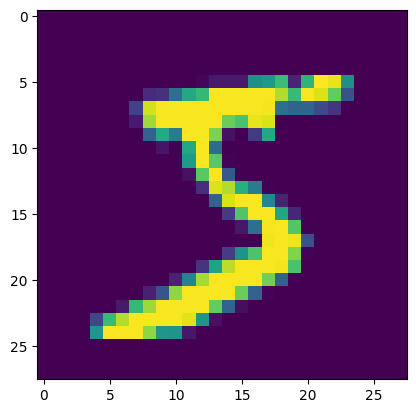

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255

In [6]:
X_test = X_test/255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
28*28

784

In [9]:
784/2

392.0

In [10]:
X_train[0].shape

(28, 28)

In [11]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [12]:
25/784

0.03188775510204082

In [13]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [14]:
autoencoder = Sequential([encoder, decoder])

In [15]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=1.5), metrics=['accuracy'])

In [16]:
autoencoder.fit(X_train, X_train, epochs = 5, validation_data = [X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.2554 - accuracy: 0.0846 - val_loss: 0.2214 - val_accuracy: 0.1211
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1986 - accuracy: 0.1430 - val_loss: 0.1755 - val_accuracy: 0.1631
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1631 - accuracy: 0.1916 - val_loss: 0.1518 - val_accuracy: 0.2051
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1493 - accuracy: 0.2113 - val_loss: 0.1404 - val_accuracy: 0.2169
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1394 - accuracy: 0.2243 - val_loss: 0.1333 - val_accuracy: 0.2325


In [17]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 1s 528ms/step


Original Image


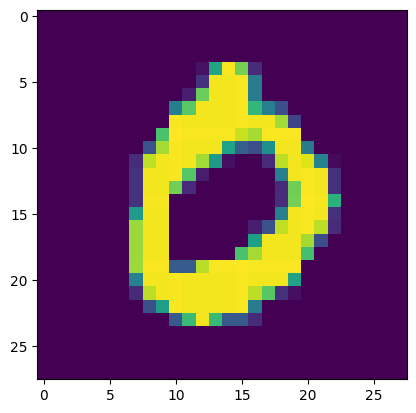

Attempted Reconstruction (after autoencoder)


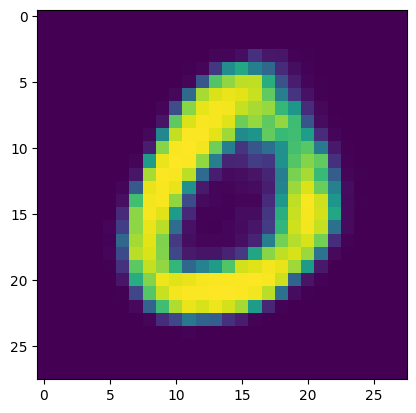

In [19]:
n=3

print('Original Image')
plt.imshow(X_test[n])
plt.show()
print('Attempted Reconstruction (after autoencoder)')
plt.imshow(passed_images[n])

In [20]:
from tensorflow.keras.layers import GaussianNoise

In [21]:
sample = GaussianNoise(0.2)

In [22]:
noisey = sample(X_test[:10], training=True)

ORIGINAL


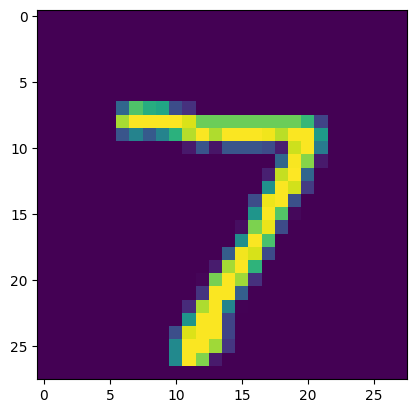

NOISE VERSION


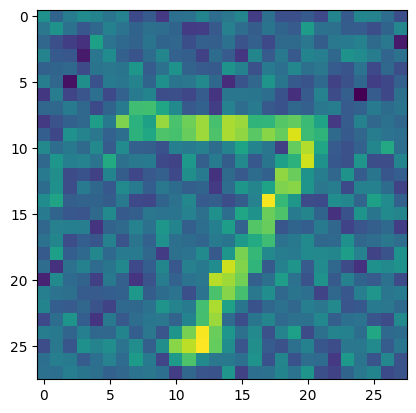

In [23]:
n = 0

print('ORIGINAL')
plt.imshow(X_test[n])
plt.show()
print('NOISE VERSION')
plt.imshow(noisey[n])
plt.show()

##**Noise Removal Autoencoder**

In [24]:
import tensorflow as tf

In [25]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [26]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [28]:
noise_remover = Sequential([encoder, decoder])

In [29]:
noise_remover.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'] )

In [30]:
noise_remover.fit(X_train, X_train, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 34s 17ms/step - loss: 0.1729 - accuracy: 0.1804
Epoch 2/8
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1298 - accuracy: 0.2368
Epoch 3/8
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1215 - accuracy: 0.2499
Epoch 4/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1165 - accuracy: 0.2564
Epoch 5/8
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1135 - accuracy: 0.2616
Epoch 6/8
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1113 - accuracy: 0.2652
Epoch 7/8
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1091 - accuracy: 0.2687
Epoch 8/8
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1072 - accuracy: 0.2725


In [31]:
ten_noisey_images = sample(X_test[:10], training=True)

In [32]:
denoised = noise_remover(ten_noisey_images)

ORIGINAL IMAGE


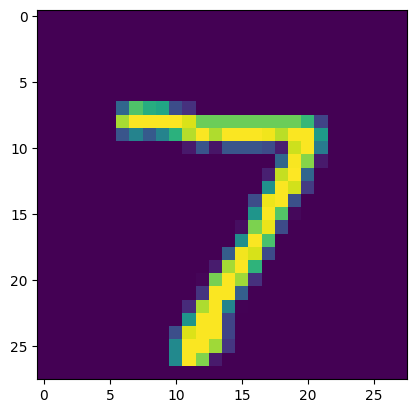

NOISE ADDED IMAGE


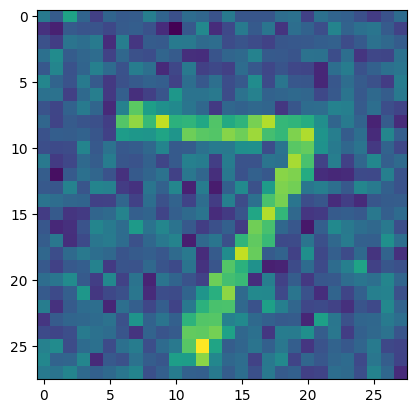

AFTER NOISE REMOVAL FROM AUTOENCODER


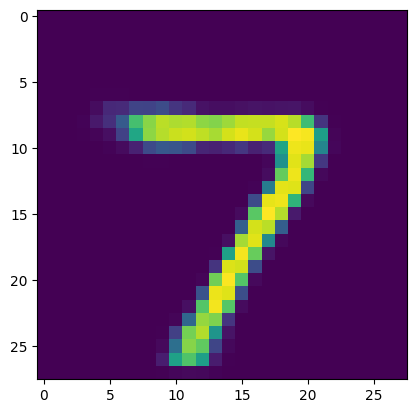

In [34]:
n=0
print('ORIGINAL IMAGE')
plt.imshow(X_test[n])
plt.show()
print('NOISE ADDED IMAGE')
plt.imshow(ten_noisey_images[n])
plt.show()
print('AFTER NOISE REMOVAL FROM AUTOENCODER')
plt.imshow(denoised[n])
plt.show()